# UNIVERSIDADE FEDERAL DE UBERLÂNDIA

# Dinâmica de Rotores

Aluno:
    
    Thiago Cesar Emrich
    
Professor:

    Aldemir Cavallini Jr.

# Sumário

- [Campbell Diagram](#Campbell Diagram)




# Campbell Diagram


# Importando bibliotecas e efetuando configurações

In [61]:
import numpy as np
import plotly.graph_objects as go
from pint import UnitRegistry
from plot_vectors import plot_vectors

# Configuring Pint
ureg = UnitRegistry()
Q_ = ureg.Quantity

Escrevendo o sistema de equações para o caso de Movimento livre $F=0$ :

$$\mathbf{m}_{disco}\ddot{q}_{1}(t) - \mathbf{a}\Omega\dot{q}_{2}(t) + \mathbf{k}q_{1}(t)=0 $$

$$\mathbf{m}_{disco}\ddot{q}_{2}(t) - \mathbf{a}\Omega\dot{q}_{1}(t) + \mathbf{k}q_{2}(t)=0 $$

Escrevendo no formato de matriz:

$$\begin{bmatrix}
    \mathbf{m}_{disco} & 0 \\ 
    0 & \mathbf{m}_{disco} 
\end{bmatrix} 
\begin{bmatrix}
     \ddot{q}_{1}(t)\\ 
    \ddot{q}_{2}(t)
\end{bmatrix} +
\Omega\begin{bmatrix}
    0 & -\mathbf{a} \\ 
    -\mathbf{a} & 0 
\end{bmatrix}
\begin{bmatrix}
     \dot{q}_{1}(t)\\ 
    \dot{q}_{2}(t)
\end{bmatrix} +
\begin{bmatrix}
    \mathbf{k} & 0 \\ 
    0 & \mathbf{k} 
\end{bmatrix}
\begin{bmatrix}
     q_{1}(t)\\ 
    q_{2}(t)
\end{bmatrix}
=0
$$


Assumindo soluções do formato:

$$q_{1}(t)=Q_{1}e^{rt}$$

$$q_{2}(t)=Q_{2}e^{rt}$$

Inserindo nas equações acima, temos: 

$$\begin{bmatrix}
    k+mr^2 & -a\Omega r \\ 
    a\Omega r & k+mr^2 
\end{bmatrix}
\begin{bmatrix}
     Q_{1}\\ 
     Q_{2}
\end{bmatrix}
=0
$$

$$det\begin{bmatrix}
    k+mr^2 & -a\Omega r \\ 
    a\Omega r & k+mr^2 
\end{bmatrix}
=0
$$

$$m^2r^4+(2km+a^2\Omega^2)r^2+k^2=0$$

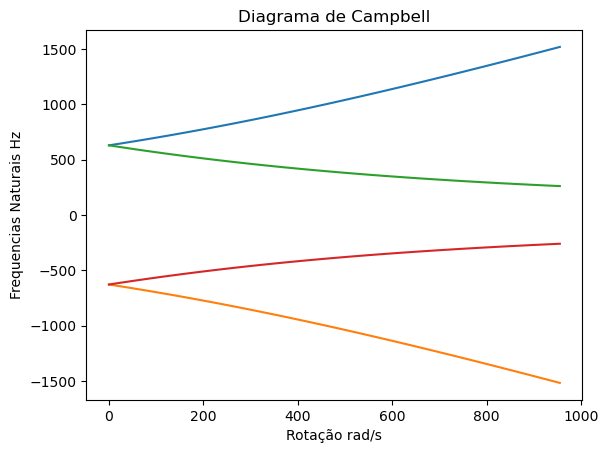

In [58]:
import numpy as np

k = 10000   # rigidez do sistema
omega = np.linspace(0, 100, 101)   # vetor de velocidades de rotação do sistema
m_disco = 1     # massa do sistema
azin = 2         # constante associada ao termo giroscópico

def calcular_raizes(a, b, c, d, e):
    coeficientes = [a, b, c, d, e]
    raizes = np.roots(coeficientes)
    return raizes

raizes = []
for w in omega:
    a = m_disco**2
    b = 0
    c = (2 * k * m_disco) + (azin**2 * w**2)
    d = 0
    e = k**2
    raiz = calcular_raizes(a, b, c, d, e)
    raizes.append(raiz)

parte_imaginaria_raizes = np.imag(raizes)*(2*np.pi)


import matplotlib.pyplot as plt

plt.plot(omega*(60/(2*np.pi)), parte_imaginaria_raizes)
plt.xlabel('Rotação rad/s')
plt.ylabel('Frequencias Naturais Hz')
plt.title('Diagrama de Campbell')
plt.show()

In [44]:
omega[250]


250.0

In [52]:
parte_imaginaria_raizes[0][0]-parte_imaginaria_raizes[0][2]


-6.60692656140327e-09

In [49]:
parte_imaginaria_raizes


array([[ 1.59154943e+01, -1.59154943e+01,  1.59154943e+01,
        -1.59154943e+01],
       [ 1.60754450e+01, -1.60754450e+01,  1.57571351e+01,
        -1.57571351e+01],
       [ 1.62369870e+01, -1.62369870e+01,  1.56003672e+01,
        -1.56003672e+01],
       ...,
       [ 3.18254183e+03, -3.18254183e+03,  7.95913997e-02,
        -7.95913997e-02],
       [ 3.18286014e+03, -3.18286014e+03,  7.95834402e-02,
        -7.95834402e-02],
       [ 3.18317844e+03, -3.18317844e+03,  7.95754822e-02,
        -7.95754822e-02]])